In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
delta_x = 0.01
delta_y = 0.0001
alpha = 3
beta = 1.5
color_scat = 'red'
color_plot = 'blue'
label1 = 'Аналитика'
label2 = 'Рунге-Кутт'
plt.style.use('seaborn')
#
# delta_x = 0.001
# delta_y = 0.00001
# alpha = 5
# beta = 3
# color_scat = 'crimson'
# color_plot = 'darkviolet'
# label1 = 'Аналитическое решение'
# label2 = 'Решение численным методом'

start = 0
stop = 40
t_step = 0.25
c0_1 = delta_x
c0_2 = delta_y
t = np.arange(start=start, stop=stop, step=t_step)
shape = t.shape[0]
dtype = np.float128



In [18]:
# beta > 0 для (0,0) - седло
alpha
beta = np.abs(beta)
x0_an = np.zeros(shape=shape, dtype=dtype)
x0_an = c0_1 * np.exp(t)
y0_an = np.zeros(shape=shape, dtype=dtype)
y0_an = c0_2 * np.exp(-beta * t)
# x4_an = np.zeros(shape=shape,dtype=dtype)

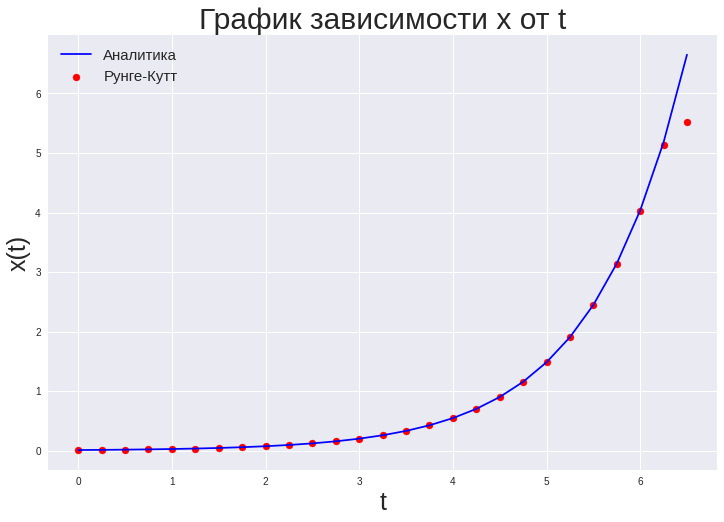

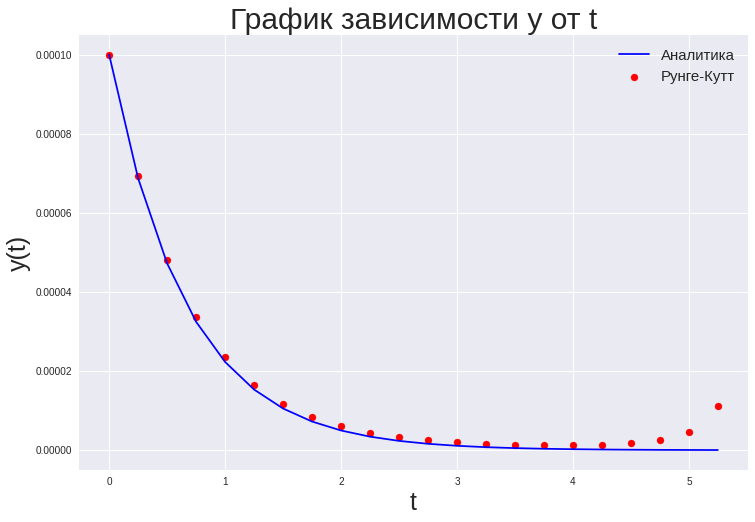

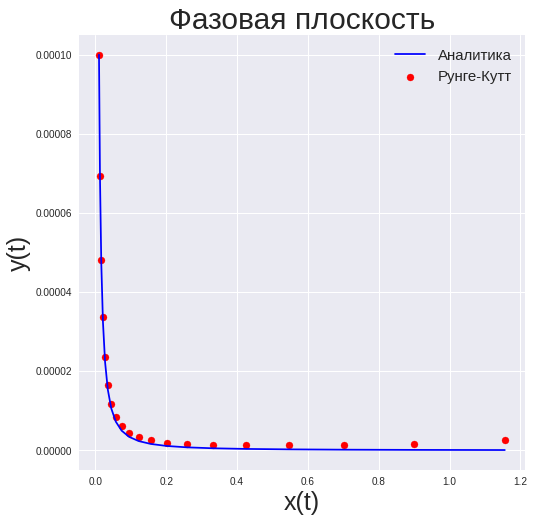

In [19]:
beta = np.abs(beta)

x4, y4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype)
x4[0] = delta_x
y4[0] = delta_y
k4_1, k4_2, k4_3, k4_4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype), np.zeros(shape,
                                                                                              dtype=dtype), np.zeros(
    shape, dtype=dtype)
q4_1, q4_2, q4_3, q4_4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype), np.zeros(shape,
                                                                                              dtype=dtype), np.zeros(
    shape, dtype=dtype)
for i in range(t.shape[0] - 1):
    k4_1[i] = t_step * x4[i] * (1 - alpha * y4[i])
    q4_1[i] = t_step * y4[i] * (alpha * x4[i] - beta)

    k4_2[i] = t_step * (x4[i] + 0.5 * k4_1[i]) * (1 - alpha * (y4[i] + 0.5 * q4_1[i]))
    q4_2[i] = t_step * (y4[i] + 0.5 * q4_1[i]) * (alpha * (x4[i] + 0.5 * k4_1[i]) - beta)

    k4_3[i] = t_step * (x4[i] + 0.5 * k4_2[i]) * (1 - alpha * (y4[i] + 0.5 * q4_2[i]))
    q4_3[i] = t_step * (y4[i] + 0.5 * q4_2[i]) * (alpha * (x4[i] + 0.5 * k4_2[i]) - beta)

    k4_4[i] = t_step * (x4[i] + k4_3[i]) * (1 - alpha * (y4[i] + q4_3[i]))
    q4_4[i] = t_step * (y4[i] + q4_3[i]) * (alpha * (x4[i] + k4_3[i]) - beta)

    x4[i + 1] = x4[i] + 1 / 6 * (k4_1[i] + 2 * k4_2[i] + 2 * k4_3[i] + k4_4[i])
    y4[i + 1] = y4[i] + 1 / 6 * (q4_1[i] + 2 * q4_2[i] + 2 * q4_3[i] + q4_4[i])

title = 'График зависимости x от t'
'Решение численным методом'
plt.figure(figsize=(12, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('t', fontsize=25)
plt.ylabel('x(t)', fontsize=25)
plt.plot(t[:27], x0_an[:27], label=f'{label1}',color = f'{color_plot}')
plt.scatter(t[:27], x4[:27], label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper left', fontsize=15)
# plt.xlim(left= -0.1,right=5)
plt.savefig('n4g/x0_ot_t')
plt.show()

title = 'График зависимости y от t'
'Решение численным методом'
plt.figure(figsize=(12, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('t', fontsize=25)
plt.ylabel('y(t)', fontsize=25)
plt.plot(t[:22], y0_an[:22], label=f'{label1}',color = f'{color_plot}')
plt.scatter(t[:22], y4[:22], label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper right', fontsize=15)
# plt.xlim(left= -0.1,right=5)
# plt.ylim(top = 0.000015, bottom = -0.00001)
plt.savefig('n4g/y0_ot_t')
plt.show()

title = 'Фазовая плоскость'
'Решение численным методом'
plt.figure(figsize=(8, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('x(t)', fontsize=25)
plt.ylabel('y(t)', fontsize=25)
plt.plot(x0_an[:20], y0_an[:20], label=f'{label1}',color = f'{color_plot}')
plt.scatter(x4[:20], y4[:20], label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper right', fontsize=15)
# plt.xlim(left=-0.001,right=0.02)
plt.savefig('n4g/fazovai0')
plt.show()

x = np.vstack((x0_an, x4))
y = np.vstack((y0_an, y4))

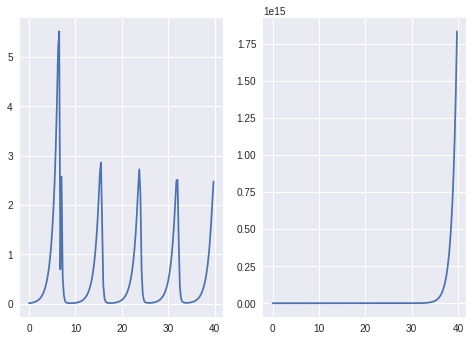

In [20]:
plt.subplot(121)
plt.plot(t, x4)
plt.subplot(122)
plt.plot(t, x0_an)

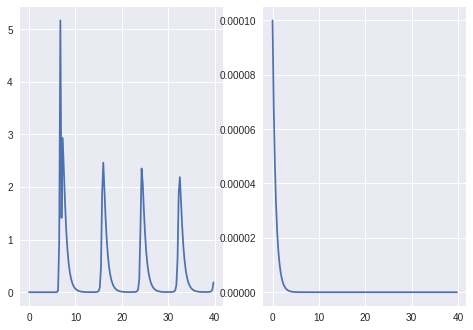

In [21]:
plt.subplot(121)
plt.plot(t, y4)
plt.subplot(122)
plt.plot(t, y0_an)

---

In [22]:
# beta < 0 для (0,0) - неустойчивый узел
beta = -np.abs(beta)
x1_an = np.zeros(shape=shape, dtype=dtype)
x1_an = c0_1 * np.exp(t)
y1_an = np.zeros(shape=shape, dtype=dtype)
y1_an = c0_2 * np.exp(-beta * t)

/tmp/ipykernel_6795/2612097335.py:15: RuntimeWarning: overflow encountered in longdouble_scalars
  k4_2[i] = t_step * (x4[i] + 0.5 * k4_1[i]) * (1 - alpha * (y4[i] + 0.5 * q4_1[i]))
/tmp/ipykernel_6795/2612097335.py:16: RuntimeWarning: overflow encountered in longdouble_scalars
  q4_2[i] = t_step * (y4[i] + 0.5 * q4_1[i]) * (alpha * (x4[i] + 0.5 * k4_1[i]) - beta)


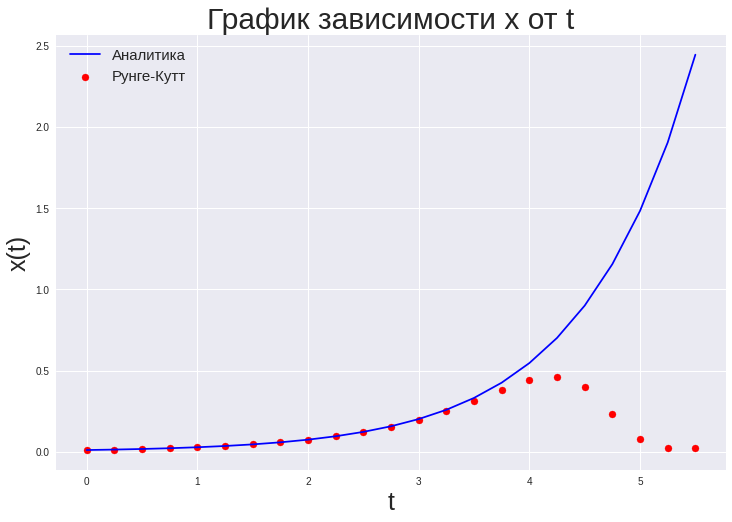

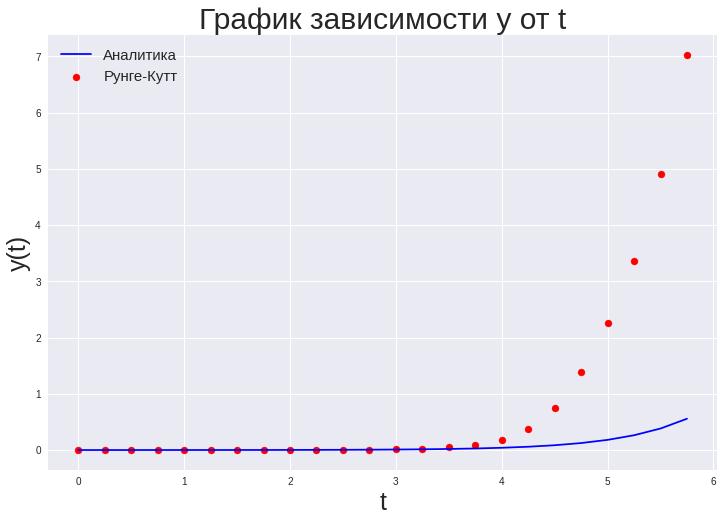

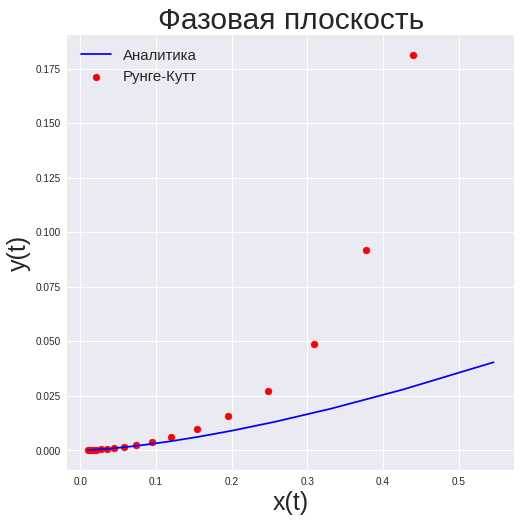

In [23]:
beta = -np.abs(beta)
x4, y4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype)
x4[0] = delta_x
y4[0] = delta_y
k4_1, k4_2, k4_3, k4_4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype), np.zeros(shape,
                                                                                              dtype=dtype), np.zeros(
    shape, dtype=dtype)
q4_1, q4_2, q4_3, q4_4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype), np.zeros(shape,
                                                                                              dtype=dtype), np.zeros(
    shape, dtype=dtype)
for i in range(t.shape[0] - 1):
    k4_1[i] = t_step * x4[i] * (1 - alpha * y4[i])
    q4_1[i] = t_step * y4[i] * (alpha * x4[i] - beta)

    k4_2[i] = t_step * (x4[i] + 0.5 * k4_1[i]) * (1 - alpha * (y4[i] + 0.5 * q4_1[i]))
    q4_2[i] = t_step * (y4[i] + 0.5 * q4_1[i]) * (alpha * (x4[i] + 0.5 * k4_1[i]) - beta)

    k4_3[i] = t_step * (x4[i] + 0.5 * k4_2[i]) * (1 - alpha * (y4[i] + 0.5 * q4_2[i]))
    q4_3[i] = t_step * (y4[i] + 0.5 * q4_2[i]) * (alpha * (x4[i] + 0.5 * k4_2[i]) - beta)

    k4_4[i] = t_step * (x4[i] + k4_3[i]) * (1 - alpha * (y4[i] + q4_3[i]))
    q4_4[i] = t_step * (y4[i] + q4_3[i]) * (alpha * (x4[i] + k4_3[i]) - beta)

    x4[i + 1] = x4[i] + 1 / 6 * (k4_1[i] + 2 * k4_2[i] + 2 * k4_3[i] + k4_4[i])
    y4[i + 1] = y4[i] + 1 / 6 * (q4_1[i] + 2 * q4_2[i] + 2 * q4_3[i] + q4_4[i])

title = 'График зависимости x от t'
'Решение численным методом'
plt.figure(figsize=(12, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('t', fontsize=25)
plt.ylabel('x(t)', fontsize=25)
plt.plot(t[:23], x1_an[:23], label=f'{label1}',color = f'{color_plot}')
plt.scatter(t[:23], x4[:23], label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper left', fontsize=15)
plt.savefig('n4g/x1_ot_t')
# plt.xlim(left= -0.1,right=5)
# plt.ylim(top=0.15)
# plt.ylim(top=10)
plt.show()

title = 'График зависимости y от t'
'Решение численным методом'
plt.figure(figsize=(12, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('t', fontsize=25)
plt.ylabel('y(t)', fontsize=25)
plt.plot(t[:24], y1_an[:24], label=f'{label1}',color = f'{color_plot}')
plt.scatter(t[:24], y4[:24], label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper left', fontsize=15)
# plt.xlim(left= -0.1)
# plt.ylim(bottom = -0.01)
plt.savefig('n4g/y1_ot_t')
# plt.xlim(right=3)
# plt.ylim(top=10)
plt.show()

title = 'Фазовая плоскость'
'Решение численным методом'
plt.figure(figsize=(8, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('x(t)', fontsize=25)
plt.ylabel('y(t)', fontsize=25)
plt.plot(x1_an[:17], y1_an[:17], label=f'{label1}',color = f'{color_plot}')
plt.scatter(x4[:17], y4[:17], label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper left', fontsize=15)
# plt.xlim(left=-0.001,right=0.02)
plt.savefig('n4g/fazovai1')
plt.show()

x = np.vstack((x1_an, x4))
y = np.vstack((y1_an, y4))

1833182301361427.5

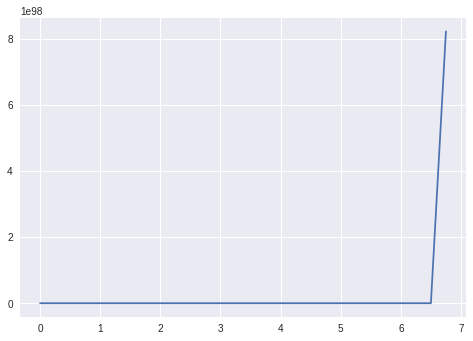

In [24]:
plt.plot(t, x4)
x1_an[-1]

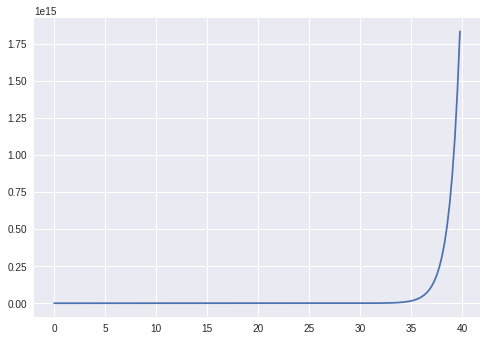

In [25]:
plt.plot(t, x1_an)

In [26]:
# beta < 0 для (a\b,1\a)- действительный случай (седло)

beta = -np.abs(beta)
c3_1 = (delta_x + delta_y * np.sqrt(-beta))/2
c3_2 = (delta_x - delta_y * np.sqrt(-beta))/2
x3_an = np.zeros(shape=shape, dtype=dtype)
x3_an = beta / alpha + c3_1 * np.exp(np.sqrt(-beta) * t) + c3_2 * np.exp(-np.sqrt(-beta) * t)
y3_an = 1 / alpha + c3_1 / np.sqrt(-beta) * np.exp(np.sqrt(-beta) * t) - c3_2 / np.sqrt(-beta) * np.exp(-np.sqrt(-beta) * t)

/tmp/ipykernel_6795/2096628634.py:18: RuntimeWarning: overflow encountered in longdouble_scalars
  k4_3[i] = t_step * (x4[i] + 0.5 * k4_2[i]) * (1 - alpha * (y4[i] + 0.5 * q4_2[i]))
/tmp/ipykernel_6795/2096628634.py:19: RuntimeWarning: overflow encountered in longdouble_scalars
  q4_3[i] = t_step * (y4[i] + 0.5 * q4_2[i]) * (alpha * (x4[i] + 0.5 * k4_2[i]) - beta)


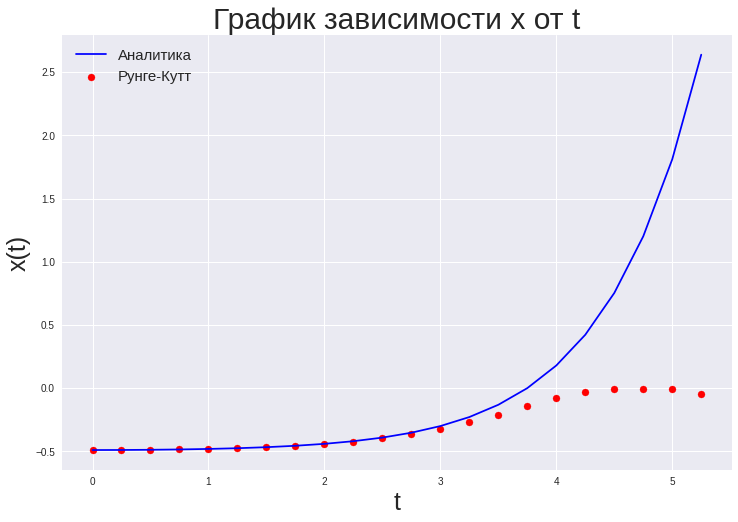

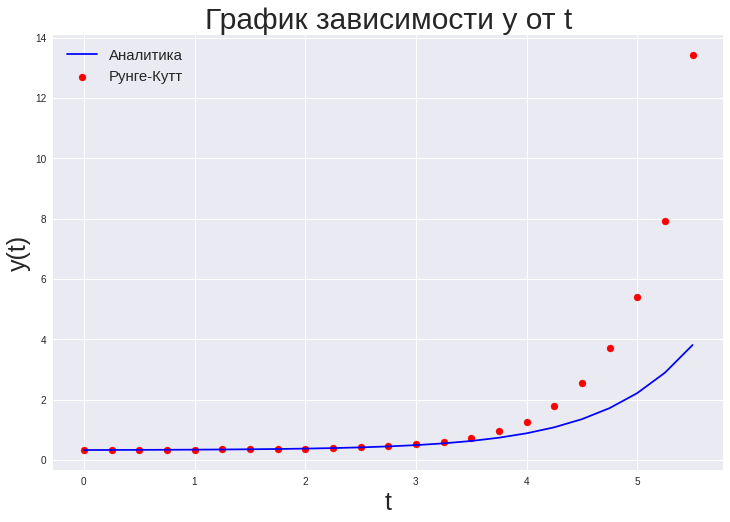

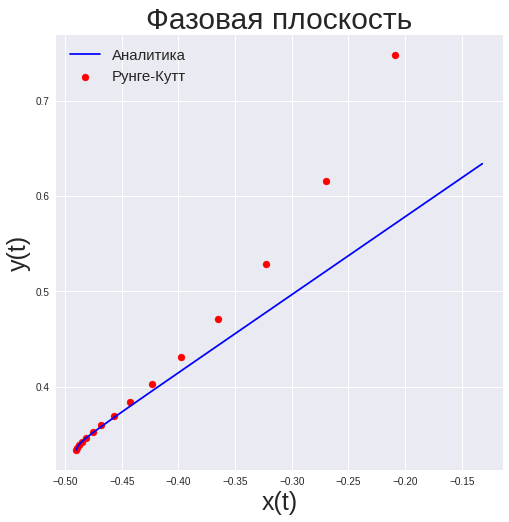

In [31]:
beta = -np.abs(beta)
x4, y4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype)
x4[0] = beta / alpha + delta_x
y4[0] = 1 / alpha + delta_y
k4_1, k4_2, k4_3, k4_4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype), np.zeros(shape,
                                                                                              dtype=dtype), np.zeros(
    shape, dtype=dtype)
q4_1, q4_2, q4_3, q4_4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype), np.zeros(shape,
                                                                                              dtype=dtype), np.zeros(
    shape, dtype=dtype)
for i in range(t.shape[0] - 1):
    k4_1[i] = t_step * x4[i] * (1 - alpha * y4[i])
    q4_1[i] = t_step * y4[i] * (alpha * x4[i] - beta)

    k4_2[i] = t_step * (x4[i] + 0.5 * k4_1[i]) * (1 - alpha * (y4[i] + 0.5 * q4_1[i]))
    q4_2[i] = t_step * (y4[i] + 0.5 * q4_1[i]) * (alpha * (x4[i] + 0.5 * k4_1[i]) - beta)

    k4_3[i] = t_step * (x4[i] + 0.5 * k4_2[i]) * (1 - alpha * (y4[i] + 0.5 * q4_2[i]))
    q4_3[i] = t_step * (y4[i] + 0.5 * q4_2[i]) * (alpha * (x4[i] + 0.5 * k4_2[i]) - beta)

    k4_4[i] = t_step * (x4[i] + k4_3[i]) * (1 - alpha * (y4[i] + q4_3[i]))
    q4_4[i] = t_step * (y4[i] + q4_3[i]) * (alpha * (x4[i] + k4_3[i]) - beta)

    x4[i + 1] = x4[i] + 1 / 6 * (k4_1[i] + 2 * k4_2[i] + 2 * k4_3[i] + k4_4[i])
    y4[i + 1] = y4[i] + 1 / 6 * (q4_1[i] + 2 * q4_2[i] + 2 * q4_3[i] + q4_4[i])

title = 'График зависимости x от t'
'Решение численным методом'
plt.figure(figsize=(12, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('t', fontsize=25)
plt.ylabel('x(t)', fontsize=25)
plt.plot(t[:22], x3_an[:22], label=f'{label1}',color = f'{color_plot}')
plt.scatter(t[:22], x4[:22], label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper left', fontsize=15)
plt.savefig('n4g/x3_ot_t')
plt.show()

title = 'График зависимости y от t'
'Решение численным методом'
plt.figure(figsize=(12, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('t', fontsize=25)
plt.ylabel('y(t)', fontsize=25)
plt.plot(t[:23], y3_an[:23], label=f'{label1}',color = f'{color_plot}')
plt.scatter(t[:23], y4[:23], label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper left', fontsize=15)
plt.savefig('n4g/y3_ot_t')
plt.show()

title = 'Фазовая плоскость'
'Решение численным методом'
plt.figure(figsize=(8, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('х(t)', fontsize=25)
plt.ylabel('y(t)', fontsize=25)
plt.plot(x3_an[:15], y3_an[:15], label=f'{label1}',color = f'{color_plot}')
plt.scatter(x4[:15], y4[:15], label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper left', fontsize=15)
plt.savefig('n4g/fazovai3')
# plt.ticklabel_format()
plt.show()

x = np.vstack((x3_an, x4))
y = np.vstack((y3_an, y4))

In [28]:
# beta < 0 для (a\b,1\a)- мнимый случай (центр)

beta = np.abs(beta)
x4_an = np.zeros(shape=shape, dtype=dtype)
x4_an = beta / alpha + delta_x * np.cos(np.sqrt(beta) * t) + delta_y * np.sqrt(beta) * np.sin(np.sqrt(beta) * t)
y4_an = 1 / alpha + delta_x / np.sqrt(beta) * np.sin(np.sqrt(beta) * t) + delta_y * np.cos(np.sqrt(beta) * t)

# y4_an = beta/(alpha*np.sqrt(beta)) * np.sin(np.sqrt(beta)*t) - beta/(alpha*np.sqrt(beta))* np.cos(np.sqrt(beta)*t)

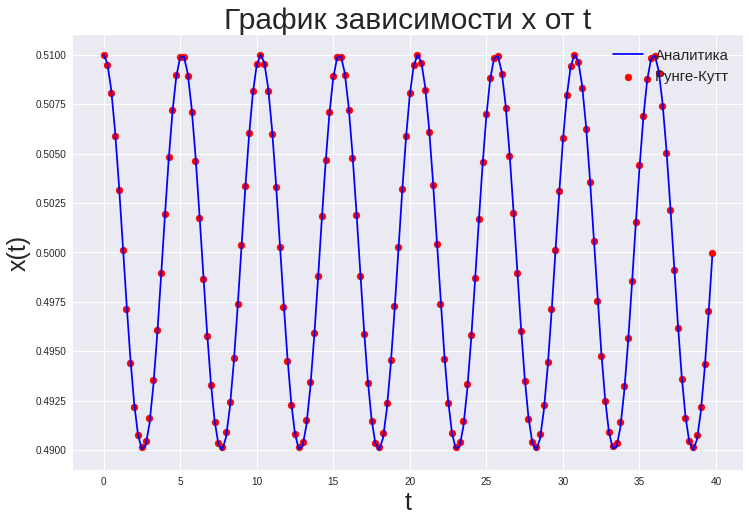

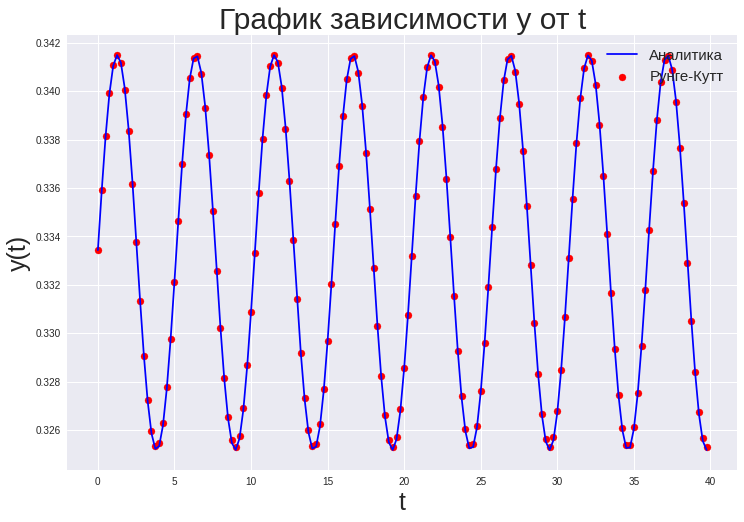

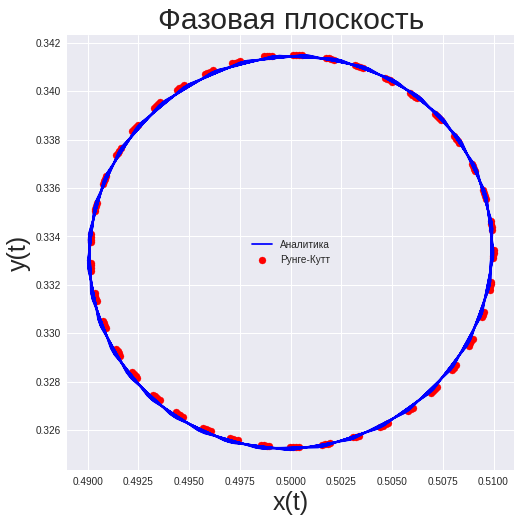

In [29]:
beta
x4, y4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype)
x4[0] = beta / alpha + delta_x
y4[0] = 1 / alpha + delta_y
k4_1, k4_2, k4_3, k4_4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype), np.zeros(shape,
                                                                                              dtype=dtype), np.zeros(
    shape, dtype=dtype)
q4_1, q4_2, q4_3, q4_4 = np.zeros(shape, dtype=dtype), np.zeros(shape, dtype=dtype), np.zeros(shape,
                                                                                              dtype=dtype), np.zeros(
    shape, dtype=dtype)
for i in range(t.shape[0] - 1):
    k4_1[i] = t_step * x4[i] * (1 - alpha * y4[i])
    q4_1[i] = t_step * y4[i] * (alpha * x4[i] - beta)

    k4_2[i] = t_step * (x4[i] + 0.5 * k4_1[i]) * (1 - alpha * (y4[i] + 0.5 * q4_1[i]))
    q4_2[i] = t_step * (y4[i] + 0.5 * q4_1[i]) * (alpha * (x4[i] + 0.5 * k4_1[i]) - beta)

    k4_3[i] = t_step * (x4[i] + 0.5 * k4_2[i]) * (1 - alpha * (y4[i] + 0.5 * q4_2[i]))
    q4_3[i] = t_step * (y4[i] + 0.5 * q4_2[i]) * (alpha * (x4[i] + 0.5 * k4_2[i]) - beta)

    k4_4[i] = t_step * (x4[i] + k4_3[i]) * (1 - alpha * (y4[i] + q4_3[i]))
    q4_4[i] = t_step * (y4[i] + q4_3[i]) * (alpha * (x4[i] + k4_3[i]) - beta)

    x4[i + 1] = x4[i] + 1 / 6 * (k4_1[i] + 2 * k4_2[i] + 2 * k4_3[i] + k4_4[i])
    y4[i + 1] = y4[i] + 1 / 6 * (q4_1[i] + 2 * q4_2[i] + 2 * q4_3[i] + q4_4[i])

title = 'График зависимости x от t'
'Решение численным методом'
plt.figure(figsize=(12, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('t', fontsize=25)
plt.ylabel('x(t)', fontsize=25)
plt.plot(t, x4_an, label=f'{label1}',color = f'{color_plot}')
plt.scatter(t, x4, label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper right', fontsize=15)
plt.savefig('n4g/x4_ot_t')
plt.show()

title = 'График зависимости y от t'
'Решение численным методом'
plt.figure(figsize=(12, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('t', fontsize=25)
plt.ylabel('y(t)', fontsize=25)
plt.plot(t, y4_an, label=f'{label1}',color = f'{color_plot}')
plt.scatter(t, y4, label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='upper right', fontsize=15)
plt.savefig('n4g/y4_ot_t')
plt.show()

title = 'Фазовая плоскость'
'Решение численным методом'
plt.figure(figsize=(8, 8))
plt.title(f'{title}', fontsize=30)
plt.xlabel('x(t)', fontsize=25)
plt.ylabel('y(t)', fontsize=25)
plt.plot(x4_an, y4_an, label=f'{label1}',color = f'{color_plot}')
plt.scatter(x4, y4, label=f'{label2}',c=f'{color_scat}')
plt.legend(loc='center', fontsize=10)
plt.savefig('n4g/fazovai4')
# plt.ticklabel_format()
plt.show()


In [30]:
# plt.figure(figsize=(18,6))
# plt.subplot(1,3,1)
# plt.scatter(x4_an,y4_an)
# # plt.ylim(top = 4, bottom = -4)
# plt.subplot(1,3,2)
# plt.plot(t,x4_an)
# plt.subplot(1,3,3)
# plt.plot(t,y4_an)
